# 데이터 이해

### 데이터 종류

### 정형 데이터

### 반정형 데이터

### 비정형 데이터

### 수치형 데이터

### 범주형 데이터

# EDA(Exploratory Data Analysis)

## 분석 방법

### 상관계수

### 특징

### 왜도

### 첨도

In [ ]:
활률 분포의 뾰족한 정도를 나타내는 지표
관측치들이 얼마나 집중적으로 중심에 몰려있는지 측정시 사용
kurt 값이 0보다 작을 경우에는 정규분포보다 더 완만하고 납작한 분포를 가진다.
kurt 값이 0보다 클 경우에는 더 큰 뽀족한 값을 지닌다.

### 이상치

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = sns.load_dataset('titanic')

In [9]:
df.shape

(891, 15)

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
df.columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [73]:
df['survived'] = df['survived']

In [16]:
df[['age', 'sibsp']]

,age,sibsp
0,22.0,1
1,38.0,1
2,26.0,0
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,NaN,1
889,26.0,0


In [74]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,29.699118,2.308642,29.699118,0.523008,0.381594,32.204208
std,14.526497,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.420000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,20.125000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,28.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,38.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,80.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
c1 = df['survived'] == 1
c2 = df['sex'] == 'female'
c3 = df['age'] > 20.0
c4 = df['age'] <= 30.0

c = c1 & c2 & c3 & c4
df_tmp = df.loc[c]
df_tmp['fare'].mean()

nan

In [33]:
df_tmp[['survived', 'sex', 'age']].describe(include='all')

,survived,sex,age
count,0.0,0,0.0
unique,NaN,0,NaN
top,NaN,NaN,NaN
freq,NaN,NaN,NaN
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN


In [24]:
df_number = df.select_dtypes(include=np.number)
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    float64
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB


In [29]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,22.0,3,22.0,1,0,7.2500
1,38.0,1,38.0,1,0,71.2833
2,26.0,3,26.0,0,0,7.9250
3,35.0,1,35.0,1,0,53.1000
4,35.0,3,35.0,0,0,8.0500


In [30]:
df_number.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,29.699118,2.308642,29.699118,0.523008,0.381594,32.204208
std,14.526497,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.420000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,20.125000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,28.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,38.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,80.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
df_number['age'].mean()

29.69911764705882

In [37]:
df_number['age'].median()

28.0

In [38]:
df_number['age'].std()

14.526497332334044

In [42]:
df_number[['age', 'survived']].corr()

,age,survived
age,1.0,1.0
survived,1.0,1.0


In [43]:
df_number['fare'].kurt()

33.39814088089868

<AxesSubplot:ylabel='Frequency'>

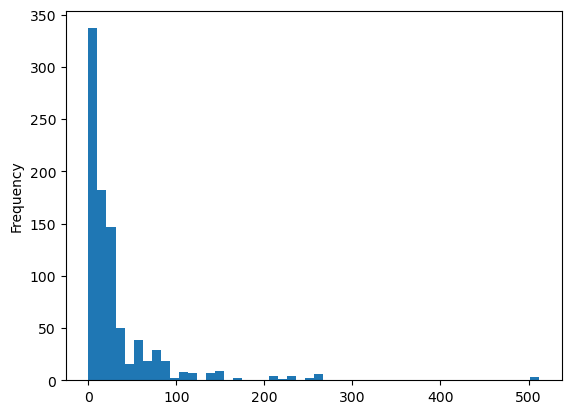

In [44]:
df_number['fare'].plot.hist(bins=50)

<AxesSubplot:>

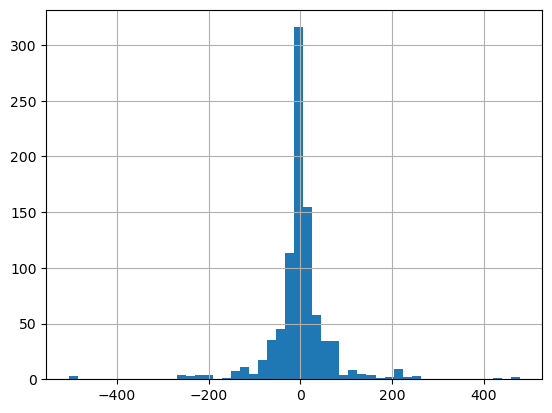

In [45]:
df_number['fare'].diff().hist(bins=50)

# 왜도 분석

In [46]:
df_number['fare'].mean(), df_number['fare'].median(), df_number['fare'].mode()

(32.2042079685746,
 14.4542,
 0    8.05
 Name: fare, dtype: float64)

In [47]:
df_number['fare'].skew()

4.787316519674893

<AxesSubplot:ylabel='Frequency'>

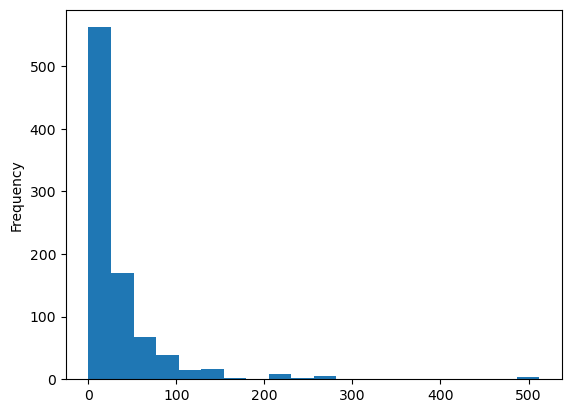

In [49]:
df_number['fare'].plot.hist(bins = 20)

<AxesSubplot:ylabel='age'>

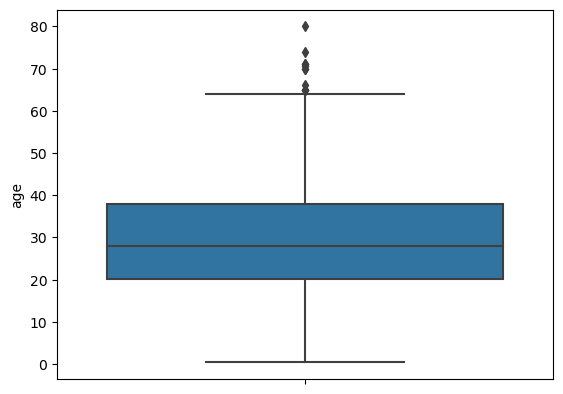

In [51]:
sns.boxplot(y=df_number['age'], data = df)

<AxesSubplot:xlabel='survived', ylabel='age'>

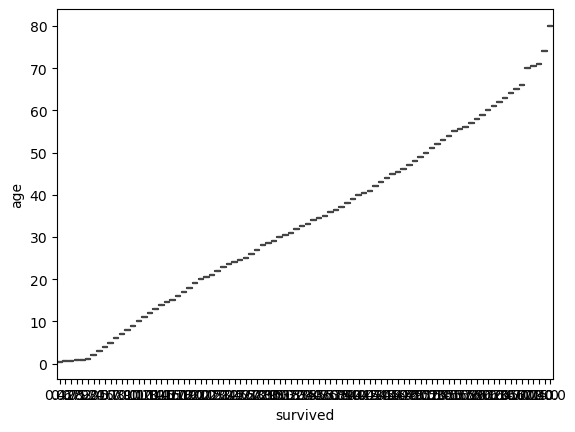

In [52]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)

In [53]:
df_number.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.369226,1.000000,-0.308247,-0.189119,0.096067
pclass,-0.369226,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,1.000000,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.308247,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,-0.189119,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.096067,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='pclass', ylabel='fare'>

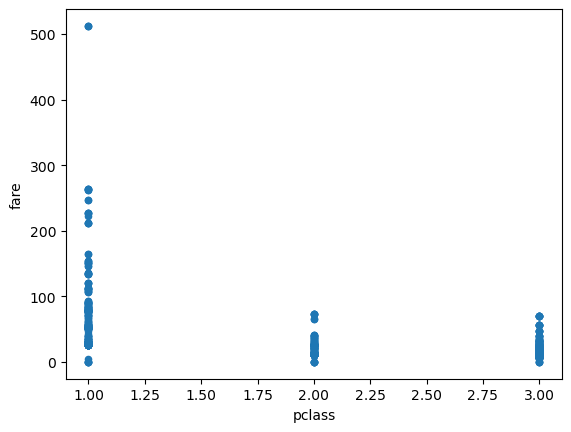

In [54]:
df_number.plot(kind='scatter', x='pclass', y='fare')

<AxesSubplot:xlabel='age', ylabel='fare'>

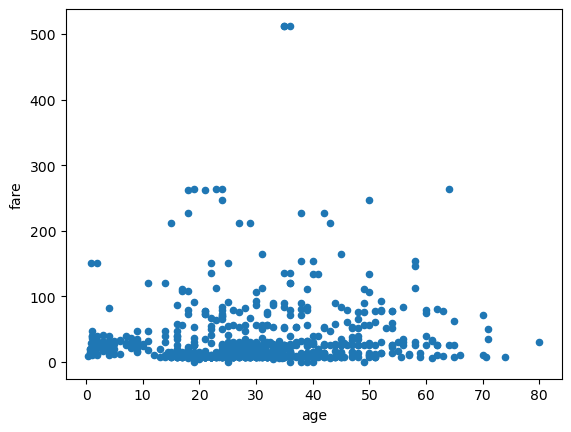

In [55]:
df_number.plot(kind='scatter', x='age', y='fare')

<AxesSubplot:>

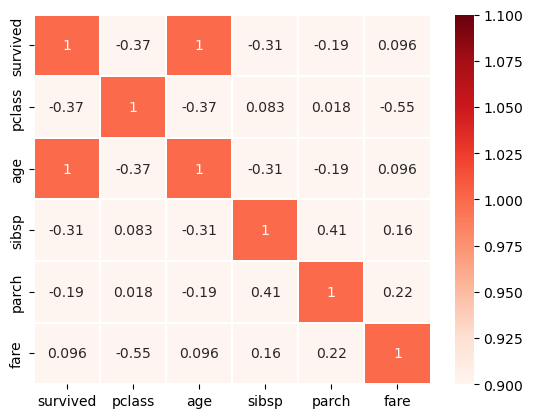

In [56]:
sns.heatmap(df_number.corr(), vmin=1, vmax=1, annot=True, linewidths=0.2,cmap='Reds')
#vmin, vmax = 최소, 최대

In [ ]:
df_number.plot()

<AxesSubplot:xlabel='survived', ylabel='fare'>

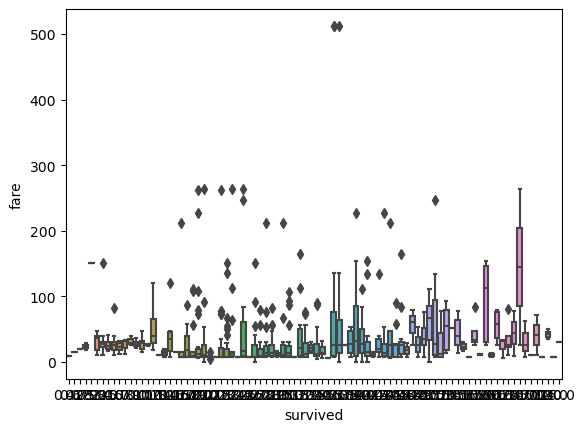

In [59]:
sns.boxplot(x=df['survived'], y=df['fare'], data=df)

In [60]:
df_object = df.select_dtypes(exclude=np.number) # object, number 구분 중요, 제외시 np.number 문

In [61]:
df_object = df_object.join(df_number['survived'])
df_object['survived'] = df_object['survived'].astype('object')
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   embarked     889 non-null    object  
 2   class        891 non-null    category
 3   who          891 non-null    object  
 4   adult_male   891 non-null    bool    
 5   deck         203 non-null    category
 6   embark_town  889 non-null    object  
 7   alive        891 non-null    object  
 8   alone        891 non-null    bool    
 9   survived     714 non-null    object  
dtypes: bool(2), category(2), object(6)
memory usage: 45.8+ KB


In [62]:
df_object.describe()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
count,891,889,891,891,891,203,889,891,891,714.0
unique,2,3,3,3,2,7,3,2,2,88.0
top,male,S,Third,man,True,C,Southampton,no,True,24.0
freq,577,644,491,537,537,59,644,549,537,30.0


In [63]:
df_object['embarked'].nunique() # 

3

In [64]:
df_object['embarked'].unique() #고유값, 숫자로 값 변환시 어떤 값을 보유중인지 분석

array(['S', 'C', 'Q', nan], dtype=object)

In [65]:
df_object['embarked'].mode() #최빈값, 제일 많이 나온 값

0    S
Name: embarked, dtype: object

In [66]:
df_object['embarked'].value_counts() #범주별 개수

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [67]:
df_object['embarked'].value_counts(normalize=True) # 비율, 몰랐던 거

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64

# 교차분석

In [76]:
df = sns.load_dataset('titanic')

In [77]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
df['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [83]:
df_object = df.select_dtypes(exclude=np.number)

In [84]:
df_object.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


In [85]:
df_object = df_object.join(df_number['survived'])
df_object['survived'] = df_object['survived'].astype('object')
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   embarked     889 non-null    object  
 2   class        891 non-null    category
 3   who          891 non-null    object  
 4   adult_male   891 non-null    bool    
 5   deck         203 non-null    category
 6   embark_town  889 non-null    object  
 7   alive        891 non-null    object  
 8   alone        891 non-null    bool    
 9   survived     714 non-null    object  
dtypes: bool(2), category(2), object(6)
memory usage: 45.8+ KB


In [87]:
df_object.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,male,S,Third,man,True,NaN,Southampton,no,False,22.0
1,female,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,female,S,First,woman,False,C,Southampton,yes,False,35.0
4,male,S,Third,man,True,NaN,Southampton,no,True,35.0


In [90]:
df_object.drop(['survived'], axis=1, inplace=True)

In [91]:
df_object.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


In [96]:
df_object = df_object.join(df['survived'])

In [97]:
pd.crosstab(df_object['sex'], df_object['survived'], margins=True) 

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [98]:
pd.crosstab(df_object['sex'],df_object['survived'],margins=True, normalize=True) #전체 기준 데이터 비율

survived,0,1,All
sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [99]:
pd.crosstab(df_object["sex"],df_object["survived"],margins=True, normalize= "columns")

survived,0,1,All
sex,,,
female,0.147541,0.681287,0.352413
male,0.852459,0.318713,0.647587


# pivot table

In [100]:
df_pivot = pd.pivot_table(df, 
                         index = 'pclass',
                         columns = 'sex',
                         values = 'survived',
                         aggfunc = ['mean', 'sum'])

df_pivot

mean              sum     
sex       female      male female male
pclass                                
1       0.968085  0.368852     91   45
2       0.921053  0.157407     70   17
3       0.500000  0.135447     72   47

In [104]:
df_pivot = pd.pivot_table(df,
                         index = ['pclass', 'sex'],
                         columns = 'survived',
                         values = ['age','fare'],
                         aggfunc = ['mean', 'max'])
df_pivot

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
pclass sex                                                                
1      female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
2      female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
3      female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
pclass sex                       
1      female  151.55  512.3292  
       male    263.00  512.3292  
2      female   26.00   65.0000  
       male     73.50   39.0000  
3      female   69.55   31.3875  
       male     69.55   56.4958

In [137]:
c1 = df['survived'] == 0
c2 = df['sex'] == 'male'
c3 = df['age'] < 20
c4 = df['age'] >= 30

c = c1 | c2 | c3 | c4
df_tmp = df.loc[c]

In [139]:
df_tmp['fare'].describe()

count    803.000000
mean      31.182482
std       48.793628
min        0.000000
25%        7.925000
50%       14.400000
75%       30.500000
max      512.329200
Name: fare, dtype: float64

In [140]:
df_tmp[['survived','sex', 'age', 'survived']].describe(include='all')

,survived,sex,age,survived
count,803.000000,803,662.000000,803.000000
unique,NaN,2,NaN,NaN
top,NaN,male,NaN,NaN
freq,NaN,577,NaN,NaN
mean,0.316314,NaN,30.098444,0.316314
std,0.465327,NaN,14.997875,0.465327
min,0.000000,NaN,0.420000,0.000000
25%,0.000000,NaN,20.000000,0.000000
50%,0.000000,NaN,29.000000,0.000000
75%,1.000000,NaN,39.000000,1.000000


In [141]:
df_pivot = pd.pivot_table(df_tmp,
                         index = ['pclass', 'sex'],
                         columns = 'survived',
                         values = ['age','fare'],
                         aggfunc = ['mean', 'max'])
df_pivot

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
pclass sex                                                                
1      female  25.666667  37.522388  110.604167  104.177800  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
2      female  36.000000  29.271739   18.250000   22.266304  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
3      female  23.818182  16.953125   19.773093   13.847137  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
pclass sex                       
1      female  151.55  512.3292  
       male    263.00  512.3292  
2      female   26.00   65.0000  
       male     73.50   39.0000  
3      female   69.55   31.3875  
       male     69.55   56.4958

In [123]:
df_tmp.describe()

,survived,pclass,age,sibsp,parch,fare
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.0,2.000000,24.615385,0.480769,0.615385,48.354406
std,0.0,0.766965,2.521701,0.779401,0.932083,66.199980
min,1.0,1.000000,21.000000,0.000000,0.000000,7.250000
25%,1.0,1.000000,22.000000,0.000000,0.000000,12.139575
50%,1.0,2.000000,24.000000,0.000000,0.000000,21.629150
75%,1.0,3.000000,27.000000,1.000000,1.000000,57.500000
max,1.0,3.000000,29.000000,3.000000,3.000000,263.000000


In [128]:
df[df.columns.difference(['df_tmp'])].describe()

,age,fare,parch,pclass,sibsp,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,3.000000,8.000000,1.000000
